In [9]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt

In [17]:
A = np.array([
    [1.0,1.0], [0, 1.0]
])

B = np.array([[0], [1]])

R = np.array([[10]])

Q = np.array([
    [1,0], [0, 0]
])

P = np.array([
    [1, 0], [0, 1]
])

x0 = np.array([-1,0])

print(A.shape)
print(B.shape)
print(Q.shape)
print(R.shape)
print(P.shape)

(2, 2)
(2, 1)
(2, 2)
(1, 1)
(2, 2)


In [18]:
def mat_diag(C, N=10):
    d  = C.shape[0]
    n  = d*N
    D  = np.zeros((n,n))
    for i in range(0,n-d+1,d):
        D[i:i+d,i:i+d] = C
    
    return D

def assemble_q(Q, P, N=10):
    Q_big = mat_diag(Q,N+1)
    d = Q.shape[0]
    Q_big[-d:,-d:] = P
    return Q_big
    
def assemble_r(R, N=10):
    return mat_diag(R,N)

def assemble_sx(A, B, N=10):
    Sx = np.concatenate([np.linalg.matrix_power(A,i) for i in range(N+1)], axis=0)
    return Sx
    
def assemble_su(A, B, N=10):
    b_rows = B.shape[0]
    b_cols = B.shape[1]
    
    su_rows = (N+1)*b_rows
    su_cols = N*b_cols
    
    Su = np.zeros( (su_rows, su_cols) )
    for i in range(N+1):
        for j in range(i):
             r = i*b_rows
             c = j*b_cols
             Su[r:r+b_rows,c:c+b_cols] = np.linalg.matrix_power(A,i-j-1).dot(B)

    return Su

In [19]:
N = 4
Sx    = assemble_sx(A, B, N)
Su    = assemble_su(A, B, N)
Q_big = assemble_q(Q,P,N)
R_big = assemble_r(R,N)

print("Sx")
print(Sx)
print("Su")
print(Su)
print("Q")
print(Q_big)
print("R")
print(R_big)

Sx
[[1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 2.]
 [0. 1.]
 [1. 3.]
 [0. 1.]
 [1. 4.]
 [0. 1.]]
Su
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 1. 0. 0.]
 [1. 1. 1. 0.]
 [3. 2. 1. 0.]
 [1. 1. 1. 1.]]
Q
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
R
[[10.  0.  0.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0.  0. 10.]]


In [20]:
H = Su.T.dot(Q_big).dot(Su)+R_big
F = -Su.T.dot(Q_big).dot(Sx)
print(H)
print(F)

z = F.dot(x0)
print(z)

u_star = np.linalg.solve(H,z)
print(u_star)

[[25.  9.  4.  1.]
 [ 9. 16.  3.  1.]
 [ 4.  3. 12.  1.]
 [ 1.  1.  1. 11.]]
[[ -6. -21.]
 [ -3. -12.]
 [ -1.  -5.]
 [ -0.  -1.]]
[6. 3. 1. 0.]
[ 0.21731052  0.06758535 -0.00387087 -0.02554773]


In [21]:
N_steps = 10
d = x0.shape[0]
du = B.shape[1]

X = np.zeros((d, N_steps))
X[:,0] = x0
U = np.zeros((du, N_steps-1))

for i in range(N_steps-1):
    z = F.dot(X[:,i])
    U[:,i] = np.linalg.solve(H,z)[:du]
    X[:,i+1] = A.dot(X[:,i]) + B.dot(U[:,i])

In [22]:
print(X)
print(U)

[[-1.         -1.         -0.78268948 -0.50095015 -0.24733267 -0.06327774
   0.04503935  0.09090441  0.09471508  0.07609039]
 [ 0.          0.21731052  0.28173932  0.25361749  0.18405493  0.10831709
   0.04586506  0.00381067 -0.01862469 -0.02610448]]
[[ 0.21731052  0.0644288  -0.02812184 -0.06956256 -0.07573784 -0.06245203
  -0.04205439 -0.02243536 -0.00747979]]


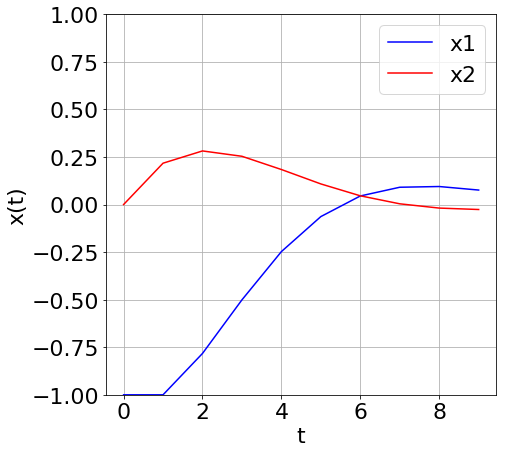

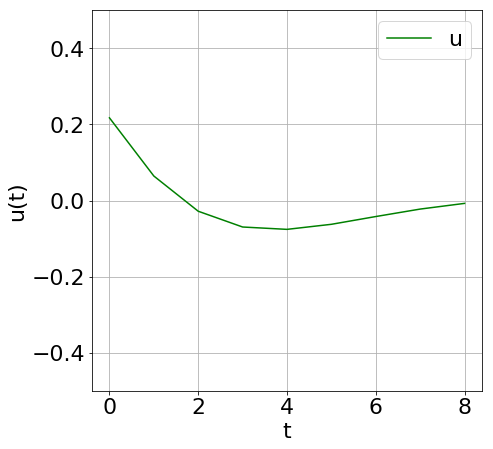

In [23]:
plt.figure(figsize=(7,7))
plt.plot(X[0,:], color='b',label='x1')
plt.plot(X[1,:], color='r',label='x2')
plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-1,1)
plt.savefig('mpc_state.png', dpi=300)
plt.show()

plt.figure(figsize=(7,7))
plt.plot(U[0,:], color='g',label='u')
plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.ylim(-0.5,0.5)
plt.savefig('mpc_control.png', dpi=300)
plt.show()